In [9]:
# user defined functions
import odor_statistics_lib as osm

# dataframes
import pandas as pd
import h5py

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import signal
from scipy import stats

#classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#plots
import string
import figurefirst
from figurefirst import FigureLayout,mpl_functions
import matplotlib.ticker as mtick
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set_style("whitegrid")
pd.options.mode.chained_assignment = None

In [3]:
dir = '~/DataAnalysis/data/Sprints/HighRes/'
fdf_windy = pd.read_hdf(dir+'Windy/WindyStats.h5')
fdf_notwindy = pd.read_hdf(dir+'NotWindy/NotWindyStats.h5')
fdf_forest = pd.read_hdf(dir+'Forest/ForestStats.h5')

In [6]:
score = pd.read_hdf(dir+'Scores.h5')


In [47]:
def get_ticks():
    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(True)

    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(True)

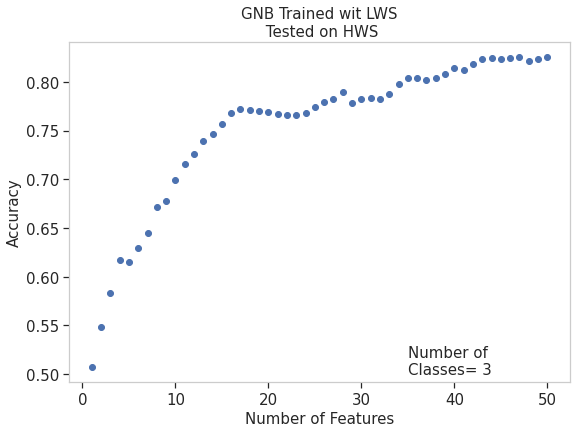

In [46]:
f , ax =plt.subplots(1,1, figsize = (8,6))
# ax.scatter(score.number_of_features, score.Accuracy)
ax.scatter(score.encounters, score.accuracy)

ax.grid(False)
ax.set_xlabel('Number of Encounters per Feature')
ax.set_ylabel('Accuracy')
get_ticks()    
ax.text(35, 0.5, 'Number of\nClasses= 3')
# ax.set_title('GNB Trained with LWS\n Tested on HWS')
ax.set_title('GNB Trained with Desert\n Tested on Forest')
f.tight_layout(pad=1)
figurefirst.mpl_functions.set_fontsize(f, 15)
# f.savefig('../../Figure/ActPred.jpeg', dpi=300, bbox_inches = "tight")

In [3]:
# def get_statistics(df,index,fdf):
#     osm.avg_distance(df,index,fdf)
#     osm.mean_conc(df,index,fdf)
#     osm.motion_statistics(df,index,fdf)
#     osm.whiff_blank_duration(df,index,fdf)
#     osm.trajectory_speed(df,index,fdf)
#     osm.encounter_frequency(df,index,fdf,1,2)
#     osm.mean_avg(df,index,fdf)
#     osm.mean_conc(df,index,fdf)

In [64]:
# np.seterr(divide = 'ignore') 
# indexF = osm.get_index_forest(forest)
# fdf_forest = pd.DataFrame()
# get_statistics(forest,indexW,fdf_forest)

In [4]:
# np.seterr(divide = 'ignore') 
# indexW = osm.get_index(windy)
# indexNW = osm.get_index(nwindy)
# fdf_windy = pd.DataFrame()
# fdf_notwindy = pd.DataFrame()
# get_statistics(windy,indexW,fdf_windy)
# get_statistics(nwindy,indexNW,fdf_notwindy)

In [5]:
# fdf_windy['type']=np.zeros(len(fdf_windy))
# fdf_notwindy['type']=np.zeros(len(fdf_notwindy))
# fdf_forest['type']=np.zeros(len(fdf_windy))

In [66]:
# fdf_forest.to_hdf(dir+'Forest/ForestStats.h5', key='fdf_forest', mode='w')

# Classify

In [3]:
def create_class_column_forest(dataframe):
    dataframe.loc[dataframe.avg_dist_from_source < 5, 'type'] = 0
    dataframe.loc[(dataframe.avg_dist_from_source >= 5)  & (dataframe.avg_dist_from_source < 10), 'type'] = 1
    dataframe.loc[dataframe.avg_dist_from_source >= 10, 'type'] = 2
    return dataframe

In [4]:
def create_class_column(dataframe):
    dataframe.loc[dataframe.avg_dist_from_source < 5, 'type'] = 0
    dataframe.loc[(dataframe.avg_dist_from_source >= 5)  & (dataframe.avg_dist_from_source < 30), 'type'] = 1
    # dataframe.loc[(dataframe.avg_dist_from_source >= 20) & (dataframe.avg_dist_from_source < 30), 'type'] = 2
    dataframe.loc[dataframe.avg_dist_from_source >= 30, 'type'] = 2
    # dataframe.loc[(dataframe.avg_dist_from_source >= 20) & (dataframe.avg_dist_from_source < 30), 'type'] = 3
    # dataframe.loc[dataframe.avg_dist_from_source >= 30, 'type'] = 4
    return dataframe

In [5]:
# for each collection of data to use for the classifier, get statistics from N encounters
def get_N_random_encounter_stats(dataframe, distance_class, N):
    df_q = dataframe.query('type == ' + str(distance_class))
    
    Nrows = df_q.sample(N)
    
    return np.ravel( Nrows[['mean_concentration','mean_ef','log_whiff','mean_ma']].values )

In [19]:
def gather_stat(dataframe, distance_class, number_of_encounters,X,y):
    for i in range(2000):
        X.append(get_N_random_encounter_stats(dataframe, distance_class, number_of_encounters))
        y.append(distance_class)
    return X,y

In [31]:
# create_class_column(fdf_notwindy)
# create_class_column(fdf_windy)
# create_class_column(fdf_forest)

In [32]:
np.arange(1,50,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [13]:
newtest  = pd.concat([fdf_notwindy, fdf_windy])
newtest.reset_index(inplace=True, drop=True) 

In [33]:
# cl = [0,1,2]
number_of_encounters = 12

## Trainset
trainset= newtest
Xtrain = []
ytrain = []

## TestSet
testset = fdf_forest
Xtest = []
ytest = []

for distance_class in [0,1,2]:
    Xtrain,ytrain = gather_stat(trainset,distance_class,number_of_encounters, Xtrain,ytrain)    
Xtrain = np.vstack(Xtrain)

for distance_class in [0,1]:
    Xtest,ytest = gather_stat(testset,distance_class,number_of_encounters, Xtest,ytest)    
# Xtest = np.vstack(Xtest)

In [43]:
score = pd.read_hdf(dir+'Scores.h5')
score

,number_of_features,Accuracy
0,1,0.512315
1,2,0.554774


In [30]:
## TRAINED WITH NOT WINDY AND TESTED on WINDY
clf = GaussianNB()
y_pred = clf.fit(Xtrain,ytrain).predict(Xtest)
print("Naive Bayes Test set Score: ",clf.score(Xtest, ytest))

# # print("Naive Bayes Train set Score: ",clf.score(Xtrain, ytrain))
print("Number of mislabeled points out of a total %d points : %d"
      % (Xtest.shape[0], (ytest != y_pred).sum()))

Naive Bayes Test set Score:  0.49925
Number of mislabeled points out of a total 4000 points : 2003


In [26]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))


Accuracy: 0.3333333333333333


In [37]:
# Train classifier
X_train, X_test, y_train, y_test = train_test_split(Xtest, ytest, test_size=0.5, random_state=0)
gnb = GaussianNB()

# test classifier
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print("Naive Bayes score: ",gnb.score(X_test, y_test))

Number of mislabeled points out of a total 4263 points : 629
Naive Bayes score:  0.8524513253577293


## Gradient Descent

In [ ]:
# def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1e-06):
#     vector = start
   
#     for _ in range(n_iter):
#         diff = -learn_rate * gradient(vector)
#         if np.all(np.abs(diff) <= tolerance):
#             break
#         vector += diff
#         a.append(vector)
#     return vector


# a = []
# vector = gradient_descent(
#     gradient=lambda v: 4 * v**3 - 10 * v - 3, start=0,
#     learn_rate=0.1
# )


# def f(x):
# #     return np.sin(x) + x + x * np.sin(x)
#     return 4 * np.power(x,3) - 10*x -3\


# x = np.linspace(-3, 3, 50)
# plt.plot(x,f(x))
# plt.plot(a,'o')
# plt.xlim(-3,3)

## Model theoretical whiff frequency as a gamma distribution with a scale factor that increases with distance

In [ ]:
def whiff_freq_from_distance(distance, N):
    scale = 1 + 4*np.log(distance+1)
    G = scipy.stats.gamma(2, 0, scale)
    raw_whiff_frequencies = G.rvs(N)
    return raw_whiff_frequencies

distance = np.logspace(-1, 3)

whiff_freqs = []
distances = []
for d in distance:
    N = 100
    wfs = whiff_freq_from_distance(d, N)
    whiff_freqs.extend( wfs.tolist() )
    distances.extend(N*[d])
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot( np.array(distances), np.array(whiff_freqs), '.', alpha=0.3)
ax.set_xscale('log')
ax.set_xlim(1e-1, 1e2)

# With increasing distance, concentration falls, whiffs harder to detect, so frequency should fall

Model concentration effect as a normal distribution with a mean that falls according to an exponential distribution

In [ ]:
def concentration_effect_from_distance(distance, N):
    mean = scipy.stats.expon(0,40).pdf(d) / 0.025
    concentration_effects = scipy.stats.norm(mean, 0.3).rvs(N)
    concentration_effects[concentration_effects<0] = 0
    return concentration_effects

distance = np.logspace(-1, 3)

conc_effects = []
distances = []
for d in distance:
    N = 100
    ces = concentration_effect_from_distance(d, N)
    conc_effects.extend( ces.tolist() )
    distances.extend(N*[d])
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot( np.array(distances), np.array(conc_effects), '.', alpha=0.3)
ax.set_xscale('log')
ax.set_xlim(1e-1, 1e2)

# Model observed whiff frequency as a product of the two

In [ ]:
whiff_freqs = []
distances = []
concentrations = []
for d in distance:
    N = 100
    
    raw_whiff_frequencies = whiff_freq_from_distance(d, N)
    concentration_effects = concentration_effect_from_distance(d, N)
    
    wfs = raw_whiff_frequencies*concentration_effects
    wfs = wfs / 10
    
    whiff_freqs.extend( wfs.tolist() )
    distances.extend(N*[d])
    concentrations.extend(concentration_effects)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot( np.array(distances), np.array(whiff_freqs), '.', alpha=0.3)

ax.set_xscale('log')
ax.set_xlim(1e-1, 1e2)
ax.set_ylim(0, 8)

In [ ]:
df = pd.DataFrame({'distance': distances, 
                       'whiff_freq': whiff_freqs, 
                       'concentration': concentrations,
                       'type': [0]*len(whiff_freqs)})